In [1]:
# import pre-installed packages and init. 
import numpy as np
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sys 
from myst_nb import glue

# add tools path and import our own tools
sys.path.insert(0, '../tools')
%load_ext autoreload
%autoreload 2
mpl.rcParams.update({'font.size': 14})

# Let us create some toy data:
from create_data import create_headturn_toy_example
X_u, Y_u = create_headturn_toy_example(num_points=1e5, prop_positive=0.05)
X, Y = create_headturn_toy_example(num_points=1e3, prop_positive=0.2)

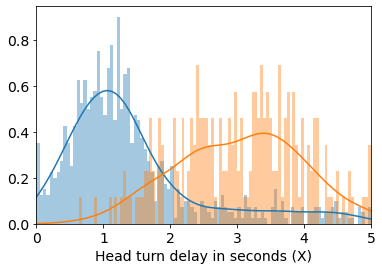

In [2]:
# Compute and plot the histogram of X values for each clas. 
df = pd.DataFrame({'X':X,'Y':Y}); 
fig = plt.figure()
sns.distplot(df.query('Y==0')['X'],bins=100, kde=True); 
sns.distplot(df.query('Y==1')['X'],bins=100, kde=True); 
plt.xlabel('Head turn delay in seconds (X)'); plt.xlim([0,5]);

glue("hist_head_turn_lab", fig, display=False)

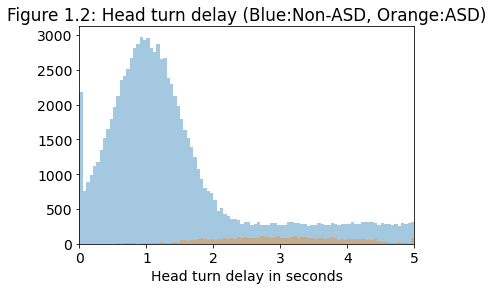

In [3]:
df = pd.DataFrame({'X':X_u,'Y':Y_u}); 
sns.distplot(df.query('Y==0')['X'],bins=100, kde=False); 
sns.distplot(df.query('Y==1')['X'],bins=100, kde=False); 
plt.xlim([0,5]); plt.title('Figure 1.2: Head turn delay (Blue:Non-ASD, Orange:ASD)'); 
plt.xlabel('Head turn delay in seconds');

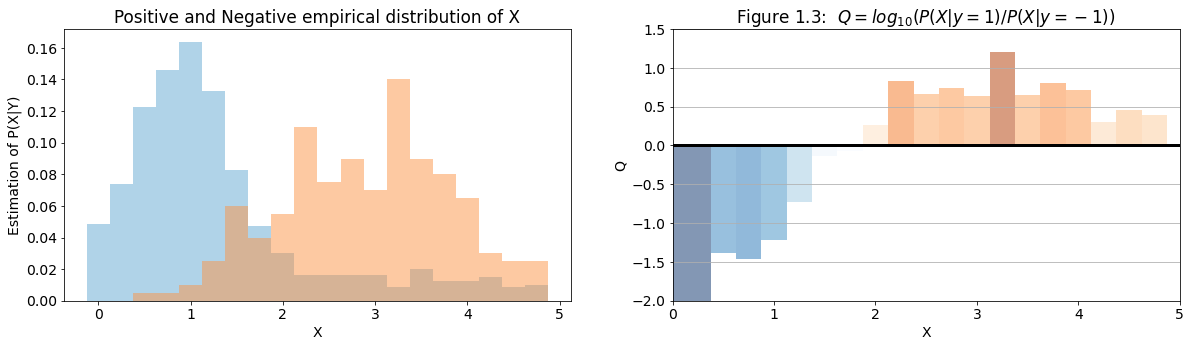

In [4]:
from stats import feature_values_positive_to_negative_ratio
Xp = X[Y==1]; Xn = X[Y==0]
Q = feature_values_positive_to_negative_ratio(Xp=Xp, Xn=Xn, verbose=1, num_bins=20)
plt.gca().set_title('Figure 1.3:  ' + plt.gca().get_title());